In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing the breast cancer data from sklearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#converting the data into a DataFrame with the respective column names
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#importing the Standard Scaler.
#In pca we have to make sure that the data is scaled. Standard Scaler will scale the data by dividing it with standard deviation.
# We can use MinMaxScaler as well. MinMax scaler will scale the data in a range of 0 to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [ ]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
#Here we are importing pca from sklearn and then we will pass the n_components as 2, this will convert the data with 30 columns into 2 columns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)


PCA(n_components=2)

In [ ]:

x_pca = pca.transform(scaled_data)

In [ ]:
#Checking the shape of the transformed data to make sure that dimensions have been reduced.
x_pca.shape

(569, 2)

In [ ]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second Principal component')

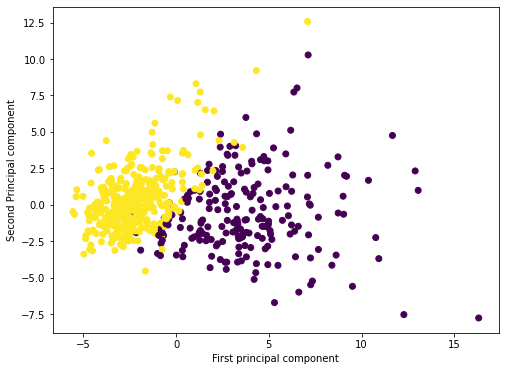

In [ ]:
#Using a scatter plot to visualize the data according to the target variable. We can see from the visualization that even though the dimensions
#have been reduced, the data is clearly seperable.
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c= cancer['target'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal component')

In [ ]:
pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance':pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['PC1', 'PC2']
pcaSummary.round(4)

,PC1,PC2
Standard deviation,3.6476,2.3878
Proportion of variance,0.4427,0.1897
Cumulative proportion,0.4427,0.6324


In [23]:
pcaComponents = pd.DataFrame(pca.components_.transpose(), columns=['PC1', 'PC2'])
pcaComponents

,PC1,PC2
0,0.218902,-0.233857
1,0.103725,-0.059706
2,0.227537,-0.215181
3,0.220995,-0.231077
4,0.142590,0.186113
5,0.239285,0.151892
6,0.258400,0.060165
7,0.260854,-0.034768
8,0.138167,0.190349
9,0.064363,0.366575
